# AirBnb Berlin 2020

This dataset contain aspects of listings in Berlin scrapped in March 2020

## Kickoff Questions
1.How do accomodation facilities impact in the final review score of each listing ?  
3.How did prices evolve over time?  
4.Heat map of hottest neighbourhoods.  

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# from google.colab import drive
# drive.mount('/content/drive')

In [72]:
# df_listings = pd.read_csv('/content/drive/My Drive/data-science-notebooks/airbnb-berlin/listings.csv')
# df_listings.head()

In [73]:
df_listings = pd.read_csv('datasets/listings_2020-03-17.csv')

Below is the correlation between aspects of accomadation with overall review score and price.

In [74]:
df_listings['float_price'] = df_listings['price'].str.replace('[$\,]','').astype('float64')
df = df_listings.select_dtypes(exclude='object')
df = df.dropna(axis=1, how='all')
df = df[df['float_price'] != 0.0]

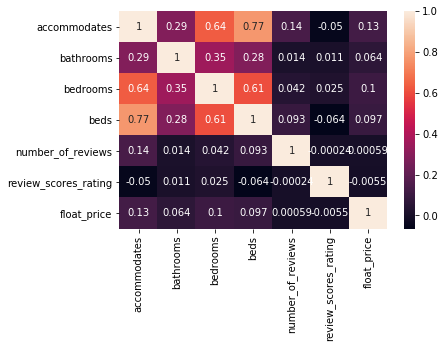

In [75]:
import seaborn as sns
df = df[['accommodates','bathrooms','bedrooms','beds','number_of_reviews','review_scores_rating','float_price']]
sns.heatmap(df.corr(), annot=True)
plt.show()

### Conclusion

**Review Score Rating** and **Price** have very little to do with accomodation characteristics as number of accomodates, bathrooms and bedrooms. 

In [76]:
# df_reviews = pd.read_csv('/content/drive/My Drive/data-science-notebooks/airbnb-berlin/reviews.csv')
df_reviews = pd.read_csv('datasets/reviews_2020-03-17.csv')

# df_reviews.head()

In [77]:
# df_calendar = pd.read_csv('/content/drive/My Drive/data-science-notebooks/airbnb-berlin/calendar.csv')
df_calendar = pd.read_csv('datasets/calendar_2020-03-17.csv')

# df_calendar.head()

In [78]:
print(f"df_listings.shape = {df_listings.shape}")
print(f"df_reviews.shape = {df_reviews.shape}")
print(f"df_calendar.shape = {df_calendar.shape}")

df_listings.shape = (25164, 107)
df_reviews.shape = (545703, 6)
df_calendar.shape = (9184860, 7)


In [79]:
# df_listings.loc[:, 'price':'extra_people'].head()

# Acommodations Overview (Prices)

Following are the questions I will explore in this section
1. How do prices vary per neigborhood ?
2. What neighborhood has the most expensive listings ?
3. What does differ a expensive listing to a cheap listing in terms of facilities? What are the most popular facilities?


Shown below are the top 10 **most** and **less** expensive neighbourhoods by listing price in average.

In [80]:
# create an additional column with price as float
df_grouped = df_listings.groupby('neighbourhood')['float_price']

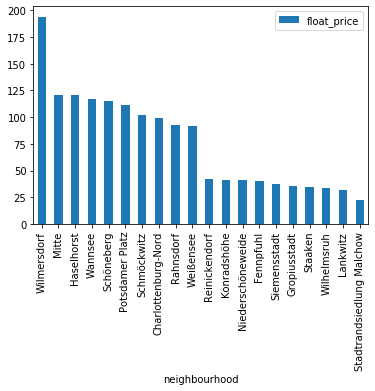

In [81]:
# sort neighbourhoods by price
df_mean = df_grouped.mean().sort_values(ascending=False)
df_mean = df_mean.reset_index()
df_mean = pd.concat([df_mean[:10], df_mean[-10:]])
df_mean.plot.bar(x='neighbourhood')

Shown below are the amenities present in more than 50% of listings in the 10 more expensive neighbourhoods

In [82]:
# select popular amenities among listings in the most expensive neighbourhoods
indexer = [item in list(df_mean[:10]['neighbourhood']) for item in df_listings['neighbourhood']]
df_expensive_neig = df_listings[indexer]
number_of_listings = df_expensive_neig.shape[0]

df_amenities = df_expensive_neig['amenities']
df_amenities = pd.DataFrame([elem.replace('{','').replace('}', '').replace('"','').split(',') for elem in df_amenities])
df_amenities = pd.DataFrame(df_amenities.values.flatten())
df_amenities = df_amenities.dropna()

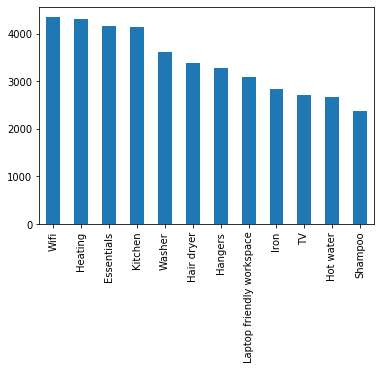

In [83]:
amenitites_counts = df_amenities[0].value_counts()
top_amenities = amenitites_counts[[count/number_of_listings > .5 for count in amenitites_counts]]
top_amenities.plot.bar()

Shown below are the amenities present in more than 50% of listings in the 10 less expensive neighbourhoods

In [84]:
# select popular amenities among listings in the less expensive neighbourhoods
indexer = [item in list(df_mean[-10:]['neighbourhood']) for item in df_listings['neighbourhood']]
df_cheap_neig = df_listings[indexer]
number_of_listings = df_cheap_neig.shape[0]

df_amenities = df_cheap_neig['amenities']
df_amenities = pd.DataFrame([elem.replace('{','').replace('}', '').replace('"','').split(',') for elem in df_amenities])
df_amenities = pd.DataFrame(df_amenities.values.flatten())
df_amenities = df_amenities.dropna()

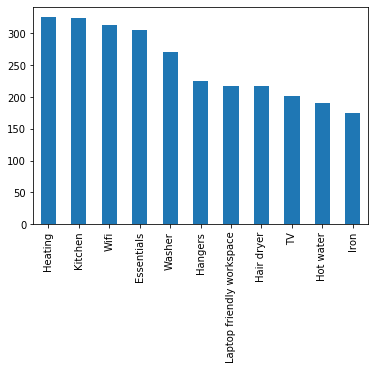

In [85]:
amenitites_counts = df_amenities[0].value_counts()
top_amenities = amenitites_counts[[count/number_of_listings > .5 for count in amenitites_counts]]
top_amenities.plot.bar()

### Conclusion

Amenities do not have huge impact on price. Nevertheless, there is a set of essential things you **MUST** have in your accomdation.

# Accomodations Overview (Reviews)

Following the questions I will explore in this section
1. How do facilities impact the final review score ?
2. What does characterize a good/bad listing (high/low review score) ?

In [86]:
df_listings.loc[:, 'number_of_reviews':'review_scores_value'].head()

,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,145,1,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0
1,27,1,2013-08-12,2019-05-31,89.0,9.0,9.0,9.0,10.0,9.0,9.0
2,133,9,2010-02-15,2020-02-16,99.0,10.0,10.0,10.0,10.0,10.0,10.0
3,292,75,2009-08-18,2020-03-06,97.0,10.0,10.0,10.0,10.0,10.0,9.0
4,8,2,2015-08-09,2020-01-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0


In [87]:
# remove lisitings with no reviews
df = df_listings[df_listings['number_of_reviews'] > 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c6cc710>]],
      dtype=object)

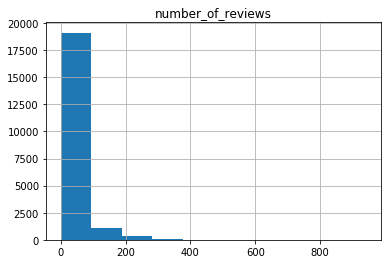

In [88]:
df[['number_of_reviews']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cecc690>]],
      dtype=object)

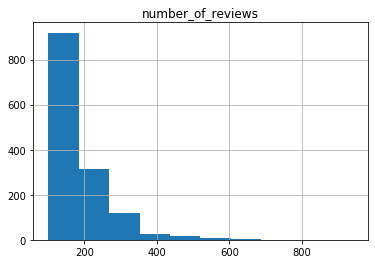

In [89]:
df = df_listings[df_listings['number_of_reviews'] > 100]
df[['number_of_reviews']].hist()

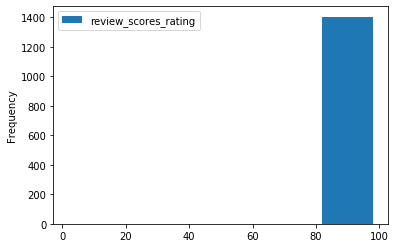

In [90]:
df[['review_scores_rating']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

# Prices Over time

Key questions of this section
1. How do prices vary over time?

**Note:** Data from previous months/year is required

In [91]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

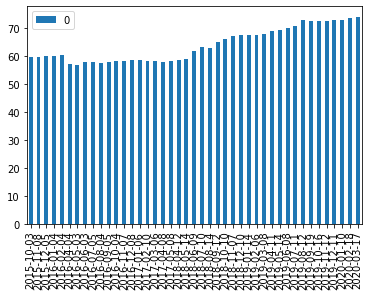

In [69]:
import pandas as pd
dates = [
    '2020-03-17',
    '2020-02-18',
    '2020-01-10',
    '2019-12-11',
    '2019-11-12',
    '2019-10-16',
    '2019-09-19',
    '2019-08-12',
    '2019-07-11',
    '2019-06-08',
    '2019-05-14',
    '2019-04-11',
    '2019-03-08',
    '2019-02-06',
    '2019-01-14',
    '2018-12-10',
    '2018-11-07',
    '2018-10-10',
    '2018-09-12',
    '2018-08-14',
    '2018-07-10',
    '2018-06-09',
    '2018-05-14',
    '2018-04-12',
    '2017-05-08',
    '2017-04-08',
    '2017-03-06',
    '2017-02-10',
    '2017-01-06',
    '2016-12-08',
    '2016-11-07',
    '2016-10-04',
    '2016-09-05',
    '2016-08-04',
    '2016-07-05',
    '2016-06-03',
    '2016-05-03',
    '2016-04-04',
    '2016-02-04',
    '2016-01-04',
    '2015-12-05',
    '2015-11-08',
    '2015-10-03'
]

def get_mean(date):
    df = pd.read_csv(f"datasets/listings_{date}.csv")
    df['float_price'] = df['price'].str.replace('[$\,]','').astype('float64')
    return df['float_price'].mean()

means = pd.DataFrame([get_mean(date) for date in reversed(dates)])
means.set_index(reversed(dates)).plot.bar()

# Hottest Neibourghoods

Key questions of this section
1. What are neighnourhoods with most number of listings ?
2. What are neighbourhoods with largest occupancy rate?
3. What are the trending neighbourhoods, i.e., those with recent spikes in number of listings ?
